# Notes

This notebook reproduces the guacamol visualization results; see Figure 2 in the paper

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.get_cachedir()
project_home = '/mnt/retmol'

In [15]:
qed = pd.read_csv(os.path.join(project_home, 'results_reproduce/guacamol/guacamol_qed.csv'))
sa = pd.read_csv(os.path.join(project_home, 'results_reproduce/guacamol/guacamol_sa.csv'))
benchmark = pd.read_csv(os.path.join(project_home, 'results_reproduce/guacamol/guacamol_benchmark.csv'))

benchmark = benchmark.iloc[7:-5]
qed = qed.iloc[7:-5]
sa = sa.iloc[7:-5]

model_names = sa.columns[1:]
model_names = [' '.join(x.split('_')[:-2]) if len(x.split('_')) > 1 else x for x in model_names]
model_names = ['Best of ChEMBL', 'SMILES GA', 'Graph MCTS', 'Graph GA', 'SMILES LSTM', 'RetMol']


qed_avg = [qed[i].mean() for i in qed.columns[1:]]
sa_avg = [sa[i].mean() for i in sa.columns[1:]]
benchmark_avg = [benchmark[i].mean() for i in benchmark.columns[1:]]

# QED plot

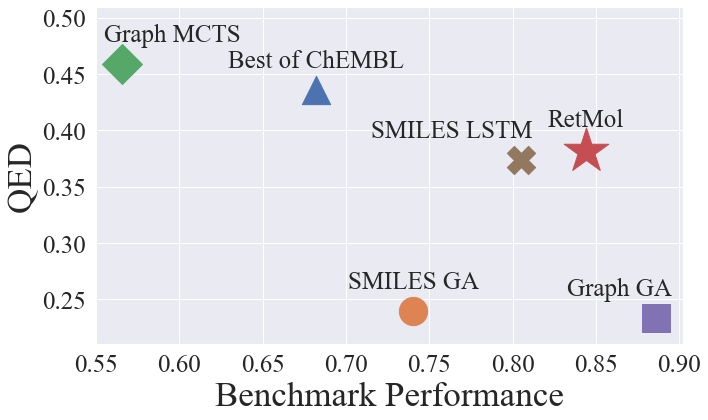

In [22]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
sns.set_theme()
sns.color_palette("hls", 8)
marker = ['^', 'o', 'D', 's', 'X', '*']
size = [800,800,800,800,800,2200]
text_y = [0.02,0.02,0.02,0.02,0.02,0.022]
text_x = [0.0,0.0,0.03,-0.022, -0.042,0.0]
for i in [0,1,2,5,3,4]:
    scatter = plt.scatter(benchmark_avg[i], qed_avg[i], s=size[i], label=model_names[i], marker=marker[i])
    plt.annotate(model_names[i], (benchmark_avg[i] + text_x[i], qed_avg[i] + text_y[i]), ha='center', fontsize=25, fontname='Times New Roman')
xtick = plt.xticks(fontsize=15)
ytick = plt.yticks(fontsize=15)
xlab = plt.xlabel('Benchmark Performance', fontsize=35, fontname='Times New Roman')
ylab = plt.ylabel('QED', fontsize=35, fontname='Times New Roman')
ylim = plt.ylim([0.21,0.51])
xtick = plt.xticks(fontsize=25, fontname='Times New Roman')
ytick = plt.yticks(fontsize=25, fontname='Times New Roman')

# save plot
# plt.savefig('guacamol_benchmark_vs_qed_MPO.pdf', bbox_inches='tight')

# SA plot

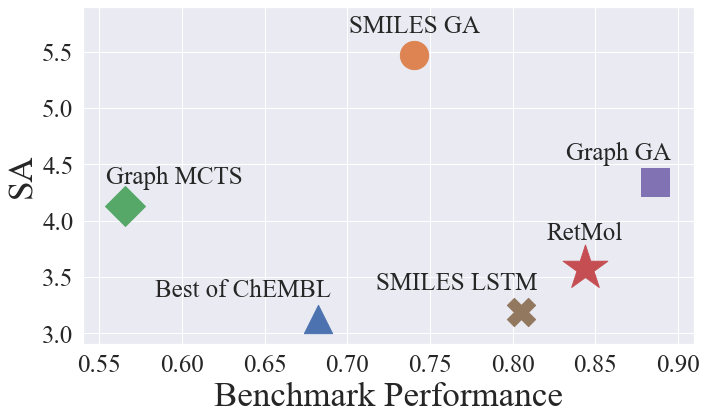

In [21]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
sns.set_theme()
sns.color_palette("hls", 8)
marker = ['^', 'o', 'D', 's', 'X', '*']
size = [800,800,800,800,800,2200]
text_y = [0.2,0.2,0.2,0.2,0.2,0.25]
text_x = [-0.045,0.0,0.03,-0.022, -0.039,0.0]
for i in [0,1,2,5,3,4]:
    scatter = plt.scatter(benchmark_avg[i], sa_avg[i], s=size[i], label=model_names[i], marker=marker[i])
    plt.annotate(model_names[i], (benchmark_avg[i] + text_x[i], sa_avg[i] + text_y[i]), ha='center', fontsize=25, fontname='Times New Roman')
xtick = plt.xticks(fontsize=15)
ytick = plt.yticks(fontsize=15)
xlab = plt.xlabel('Benchmark Performance', fontsize=35, fontname='Times New Roman')
ylab = plt.ylabel('SA', fontsize=35, fontname='Times New Roman')
xtick = plt.xticks(fontsize=25, fontname='Times New Roman')
ytick = plt.yticks(fontsize=25, fontname='Times New Roman')
ylim = plt.ylim([2.9,5.9])
xlim = plt.xlim([0.54, 0.91])

# save plot
# plt.savefig('guacamol_benchmark_vs_sa_MPO.pdf', bbox_inches='tight')